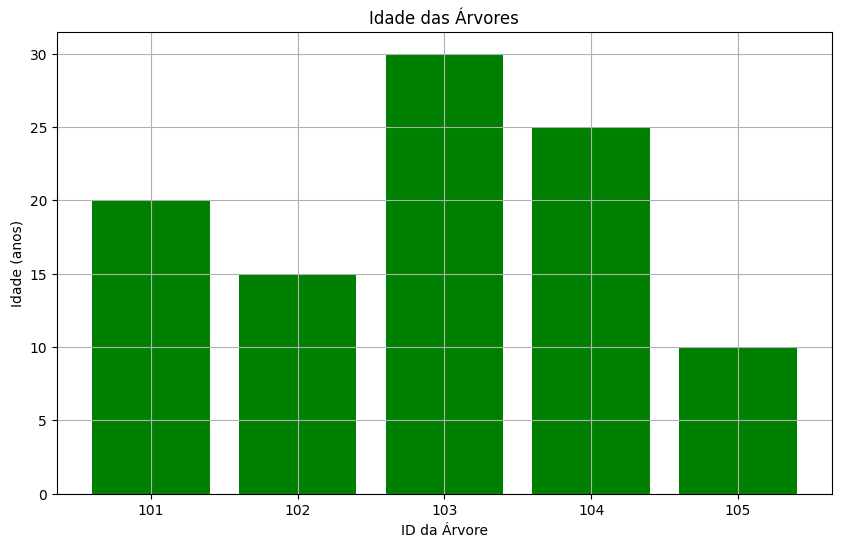

Alerta: A saúde da árvore 102 está razoável. Monitoramento recomendado.
Alerta: A saúde da árvore 103 está ruim. Ação necessária!
Alerta: A saúde da árvore 105 está razoável. Monitoramento recomendado.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class TreeMonitoringSystem:
    def __init__(self):
        # Dados históricos de saúde das árvores (apenas para simulação)
        self.historical_data = pd.DataFrame({
            'tree_id': [101, 102, 103, 104, 105],
            'health_status': ['good', 'fair', 'poor', 'good', 'fair'],
            'age': [20, 15, 30, 25, 10]  # Idade estimada das árvores em anos
        })
        self.latest_sensor_data = None

    def update_sensor_data(self, new_sensor_data):
        # Assume que new_sensor_data é um DataFrame com as novas medições
        self.latest_sensor_data = new_sensor_data

    def integrate_data(self):
        if self.latest_sensor_data is None:
            print("Não há novos dados de sensoriamento remoto para integrar.")
            return

        # Integração dos dados históricos com os dados mais recentes
        merged_data = pd.merge(self.historical_data, self.latest_sensor_data, on='tree_id', how='left')

        # Cálculo de métricas de saúde das árvores
        merged_data['overall_health'] = np.where(merged_data['health_status_y'].notnull(), merged_data['health_status_y'], merged_data['health_status_x'])

        # Visualização de dados
        self.visualize_data(merged_data)

        # Verificação de alertas
        self.check_alerts(merged_data)

    def visualize_data(self, data):
        # Visualização simples dos dados
        plt.figure(figsize=(10, 6))
        plt.bar(data['tree_id'], data['age'], color='green')
        plt.xlabel('ID da Árvore')
        plt.ylabel('Idade (anos)')
        plt.title('Idade das Árvores')
        plt.xticks(data['tree_id'])
        plt.grid(True)
        plt.show()

    def check_alerts(self, data):
        # Verificação de alertas com base nas métricas de saúde
        for index, row in data.iterrows():
            if row['overall_health'] == 'poor':
                print(f"Alerta: A saúde da árvore {row['tree_id']} está ruim. Ação necessária!")
            elif row['overall_health'] == 'fair':
                print(f"Alerta: A saúde da árvore {row['tree_id']} está razoável. Monitoramento recomendado.")

# Exemplo de uso
monitoring_system = TreeMonitoringSystem()

# Simulação de novos dados de sensoriamento remoto
new_sensor_data = pd.DataFrame({
    'tree_id': [101, 103, 105],
    'health_status': ['good', 'poor', 'fair'],
    'temperature': [25.5, 24.8, 26.3]
})

monitoring_system.update_sensor_data(new_sensor_data)
monitoring_system.integrate_data()
